In [36]:
# This is query for the Assortative Coefficient template
import pandas as pd
import glob
import matplotlib.pyplot as plt

In [37]:
# Path for all the results
path="/mnt/indexer-build/migrated_data/curated/assortativity_coeff/"

In [38]:
def extractorYear(year):
    return(int(str(year)[:4]))

def extractorWeek(year):
    return(int(str(year)[4:]))

In [39]:
all_files = glob.glob(path + "/*/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

In [40]:
frame["year"]=frame.time_week.apply(extractorYear)
frame["week"]=frame.time_week.apply(extractorWeek)
final1 = frame.sort_values(by=['year','week'])

In [42]:
extra = final1[((final1.year == 2018) & (final1.week < 26)) | ((final1.year == 2022) & (final1.week > 34))]

In [44]:
extra

,assortative_coeff,time_week,year,week
164,-0.464289,20181,2018,1
145,-0.284762,202252,2022,52


In [55]:
df = pd.merge(final1, extra, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)

<AxesSubplot: xlabel='date'>

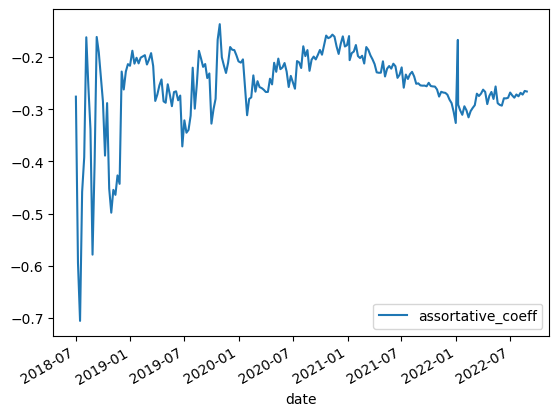

In [57]:
# Determine the date
df['date'] = pd.to_datetime(df.assign(day=1, month=1)[['year', 'month', 'day']])+pd.to_timedelta(df.week*7, unit='days')

# Plot
fig, ax = plt.subplots()
df.plot(x='date', y='assortative_coeff', ax=ax)